<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S9_C3_Kmeans_init_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install deap > null

In [ ]:
# Genetic TSP implementation:
import random
import json
import numpy as np
import matplotlib.pyplot as plt
# deep es la experta en algoritmo gnenetico
from deap import algorithms
from deap import creator # metodo
from deap import base
from deap import tools

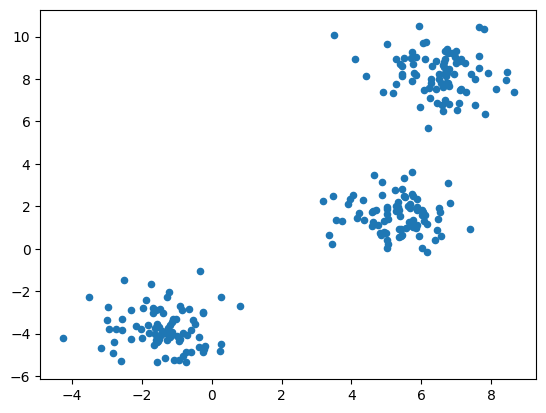

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 250, n_features=2, centers=3, cluster_std=0.9, shuffle=True, random_state=231)
plt.scatter(X[:,0], X[:,1], s=20, marker='o')

In [ ]:
size_chromosome = X.shape[0]
K = 2
W = [random.randint(1, K ) for _ in range(size_chromosome) ]

In [ ]:
X.shape

(250, 2)

Parte 1. Definir el problema
* Como vamos a medir/determinar que la posicion de los centroides es la adecuada?

In [ ]:
# Fitness funtion

#midiendo la dispersion de los datos respecto a los centroides
#imputs: centroides, datos

In [ ]:
# Agrupar índices de datos según los clústeres a los que pertenecen.
def decode(W, K):
  cluster_book = {}
  for cluster in range(1, K+1):
    cluster_book[cluster]  = []
  for index in range(len(W)):
    cluster_book[W[index]].append(index)
  return cluster_book
def computeCentroids(features,
                     k,
                     cluster_book):
  return features[cluster_book[k]].sum(axis=0) / features[cluster_book[k]].shape[0]

def S(features , k, cluster_book):
  # calculate the within distance for the cluster K
  if X[cluster_book[k]].shape[0] == 0:
    return 999 # chage this to avoid empty clusterings
  else:
    return ((features[cluster_book[k]] -   computeCentroids(features, k, cluster_book ))**2).sum(axis=0).sum()

def Total_S(W, K, cluster_book, features):
  X = features.copy()
  # Calculate the total distance within distance from the cluster
  acum = 0
  for k in range(1,K+1):
    acum += S(X ,k, cluster_book)
  return acum


In [ ]:
def fitness(W, K, features):
  cluster_book = decode(W, K)
  return Total_S(W,K, cluster_book, X)

In [ ]:
# Caja de herramnioentas
toolbox = base.Toolbox()

In [ ]:
size_cromosoma = 6
K = 3

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
toolbox.create("cluster_id", random.randint, 1, K) # Alelos
# crea los individuos
toolbox.register("individuo", tools.initRepeat, creator.Individual, toolbox.cluster_id, n=size_cromosoma)
# crea la poblacion agrupando los individuos
toolbox.register("population", tools.initRepeat, list, toolbox.individuo)

toolbox.register("evaluacion", lambda w: fitness(XXXX))
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)


In [ ]:
def main():
    random.seed(101)
    CXPB, MUTPB, NGEN = 0.95, 0.05, 10
    pop = toolbox.population() # genereme la poblacion
    #MU, LAMBDA = len(pop), len(pop) 3 Pertenece al otro algoritmo
    hof = tools.HallOfFame(1) # Mantiene a los mejores individuos en cada generacion 1

    logbook = tools.Logbook()
    return pop, logbook

if __name__ == "__main__":
    best, log  = main()
    print("\n",'--'*50)
    print(f"The fitness {best[0].fitness.values} and he better path is : \n",)
    #print(capitals[best[0]])
    print("--"*50)

In [ ]:
"""def main():
    random.seed(101)
    CXPB, MUTPB, NGEN = 0.95, 0.05, 10
    pop = toolbox.population() # genereme la poblacion
    #MU, LAMBDA = len(pop), len(pop) 3 Pertenece al otro algoritmo
    hof = tools.HallOfFame(1) # Mantiene a los mejores individuos en cada generacion 1
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    # Para cada poblacion registre las estadísticas
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, CXPB, MUTPB, NGEN)
    #pop, logbook = algorithms.eaMuPlusLambda(pop,toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN,
                                            #stats = stats, halloffame=hof)
    return pop, logbook

if __name__ == "__main__":
    best, log  = main()
    print("\n",'--'*50)
    print(f"The fitness {best[0].fitness.values} and he better path is : \n",)
    #print(capitals[best[0]])
    print("--"*50)
"""